In [2]:
ls

drive/  sample_data/


In [3]:
cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [4]:
ls

flowers/  Flowers-Dataset.zip  flowers.h5


In [5]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg

Data Augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_data_gen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip = True,vertical_flip = True)

In [8]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [9]:
x_train = train_data_gen.flow_from_directory("/content/drive/MyDrive/Dataset/flowers",target_size = (64,64),class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [10]:
x_test = test_data_gen.flow_from_directory("/content/drive/MyDrive/Dataset/flowers",target_size = (64,64),class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [12]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300,activation = 'relu'))
model.add(Dense(5,activation = 'softmax'))

Compiling the Model

In [13]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

fitting the Model

In [26]:
model.fit(x_train, steps_per_epoch = len(x_train),epochs = 10,validation_data = x_test,validation_steps = len(x_test))

Epoch 1/10
180/180 [==============================] - 35s 193ms/step - loss: 0.6616 - accuracy: 0.7521 - val_loss: 0.6369 - val_accuracy: 0.7556
Epoch 2/10
180/180 [==============================] - 35s 198ms/step - loss: 0.6305 - accuracy: 0.7684 - val_loss: 0.5464 - val_accuracy: 0.7943
Epoch 3/10
180/180 [==============================] - 34s 187ms/step - loss: 0.5835 - accuracy: 0.7830 - val_loss: 0.5256 - val_accuracy: 0.8063
Epoch 4/10
180/180 [==============================] - 34s 192ms/step - loss: 0.5849 - accuracy: 0.7816 - val_loss: 0.4903 - val_accuracy: 0.8112
Epoch 5/10
180/180 [==============================] - 34s 187ms/step - loss: 0.5691 - accuracy: 0.7869 - val_loss: 0.4787 - val_accuracy: 0.8256
Epoch 6/10
180/180 [==============================] - 34s 188ms/step - loss: 0.5704 - accuracy: 0.7820 - val_loss: 0.4805 - val_accuracy: 0.8209
Epoch 7/10
180/180 [==============================] - 34s 187ms/step - loss: 0.5447 - accuracy: 0.7955 - val_loss: 0.4564 - val_ac

Saving the Model

In [27]:
model.save('flowers.h5')

Testing the Model

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [29]:
model = load_model('/content/drive/MyDrive/Dataset/flowers.h5')

In [30]:
img = image.load_img('/content/drive/MyDrive/Dataset/flowers/daisy/10559679065_50d2b16f6d.jpg',target_size = (150,150))

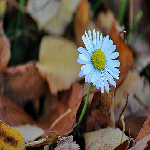

In [31]:
img

In [32]:
img = image.load_img('/content/drive/MyDrive/Dataset/flowers/sunflower/10386525005_fd0b7d6c55_n.jpg',target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'sunflower'

In [33]:
img = image.load_img('/content/drive/MyDrive/Dataset/flowers/daisy/10300722094_28fa978807_n.jpg',target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'sunflower'

In [34]:
img = image.load_img('/content/drive/MyDrive/Dataset/flowers/tulip/112428919_f0c5ad7d9d_n.jpg',target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'tulip'

In [35]:
img = image.load_img('/content/drive/MyDrive/Dataset/flowers/rose/12238827553_cf427bfd51_n.jpg',target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'rose'

In [36]:
img = image.load_img('/content/drive/MyDrive/Dataset/flowers/dandelion/10777398353_5a20bb218c.jpg',target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'sunflower'